In [2]:
!pip install matplotlib pandas numpy


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

data = {
    'R&D_Spend': [165349, 162597, 153441, 144372, 142107, 131876, 134615, 130298, 120542, 123334],
    'Administration': [136897, 151377, 101145, 118671, 91391, 99814, 147198, 145530, 148718, 108679],
    'Marketing_Spend': [471784, 443898, 407934, 383199, 366168, 362861, 127716, 323876, 311613, 304981],
    'State': ['New York', 'California', 'Florida', 'New York', 'Florida', 'New York', 'California', 'Florida', 'New York', 'California'],
    'Profit': [192261, 191792, 191050, 182901, 166187, 156991, 156122, 155752, 152211, 149759]
}
df = pd.DataFrame(data)
print(df.head())

   R&D_Spend  Administration  Marketing_Spend       State  Profit
0     165349          136897           471784    New York  192261
1     162597          151377           443898  California  191792
2     153441          101145           407934     Florida  191050
3     144372          118671           383199    New York  182901
4     142107           91391           366168     Florida  166187


In [6]:
df.isnull().sum()

R&D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df["Total_Spend"] = df["R&D_Spend"] + df["Administration"] + df["Marketing_Spend"]

In [8]:
df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit,Total_Spend
0,165349,136897,471784,New York,192261,774030
1,162597,151377,443898,California,191792,757872
2,153441,101145,407934,Florida,191050,662520
3,144372,118671,383199,New York,182901,646242
4,142107,91391,366168,Florida,166187,599666


In [17]:
df = pd.get_dummies(df, columns=["State"], drop_first=True)

In [18]:
df.head()

,R&D_Spend,Administration,Marketing_Spend,Profit,Total_Spend,State_Florida,State_New York
0,165349,136897,471784,192261,774030,False,True
1,162597,151377,443898,191792,757872,False,False
2,153441,101145,407934,191050,662520,True,False
3,144372,118671,383199,182901,646242,False,True
4,142107,91391,366168,166187,599666,True,False


In [21]:
from sklearn.model_selection import train_test_split



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   R&D_Spend        10 non-null     int64
 1   Administration   10 non-null     int64
 2   Marketing_Spend  10 non-null     int64
 3   Profit           10 non-null     int64
 4   Total_Spend      10 non-null     int64
 5   State_Florida    10 non-null     bool 
 6   State_New York   10 non-null     bool 
dtypes: bool(2), int64(5)
memory usage: 552.0 bytes


In [28]:
X = df.drop(columns=["Profit"])
y = df["Profit"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([145048.35728863, 192407.89851625])

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mae

3889.270613808636

In [41]:
r2 = r2_score(y_test, y_pred)
r2

0.9340215132418217

In [42]:
df.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit,Total_Spend,State_Florida,State_New York
R&D_Spend,1.000000,0.053182,0.670723,0.951684,0.770627,0.048403,-0.017542
Administration,0.053182,1.000000,-0.207241,0.005085,0.042791,-0.360424,0.039731
Marketing_Spend,0.670723,-0.207241,1.000000,0.729777,0.962971,0.112619,0.287966
Profit,0.951684,0.005085,0.729777,1.000000,0.806409,0.057592,0.076382
Total_Spend,0.770627,0.042791,0.962971,0.806409,1.000000,0.029119,0.268176
State_Florida,0.048403,-0.360424,0.112619,0.057592,0.029119,1.000000,-0.534522
State_New York,-0.017542,0.039731,0.287966,0.076382,0.268176,-0.534522,1.000000


In [44]:
!pip install seaborn

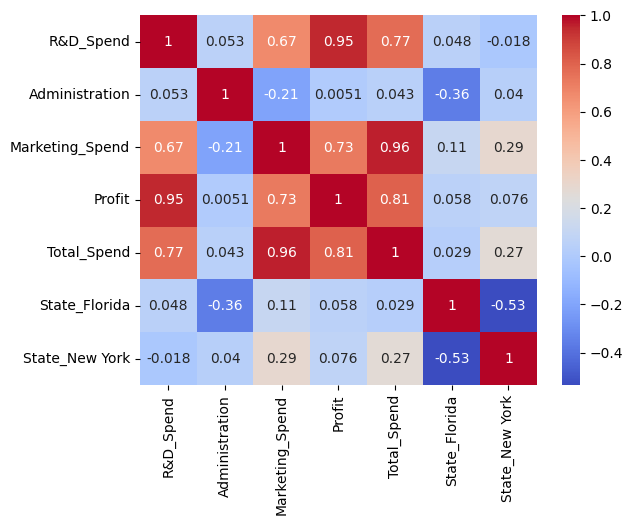

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.scatter(y_test, y_pred)